In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
frames = {}
names = ["checkpoints_eoc", "checkpoints_pulse", "items", "media_views", "page_views", "responses"]
for name in names:
    frames[name] = pd.read_csv("Random Sample of Data Files_03_04/"+name+".csv")

C:\Users\alexe\AppData\Local\Temp\ipykernel_19676\2453505795.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  frames[name] = pd.read_csv("Random Sample of Data Files_03_04/"+name+".csv")
C:\Users\alexe\AppData\Local\Temp\ipykernel_19676\2453505795.py:4: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  frames[name] = pd.read_csv("Random Sample of Data Files_03_04/"+name+".csv")


In [3]:
pulse = frames["checkpoints_pulse"].dropna()
eoc = frames["checkpoints_eoc"].dropna()
items = frames["items"]
media_views = frames["media_views"]
page_views = frames["page_views"]
responses = frames["responses"]

In [4]:
for x in frames.items():
    print(x[0],"\n",x[1].isna().sum())
    print()

checkpoints_eoc 
 student_id        0
class_id          0
chapter_number    0
book              0
EOC               7
n_possible        0
n_correct         0
n_attempt         0
dtype: int64

checkpoints_pulse 
 book                 0
release              0
institution_id       0
class_id             0
student_id           0
chapter_number       0
construct            0
response          4782
dtype: int64

items 
 institution_id               0
class_id                     0
item_id                      0
item_type                    0
chapter                      0
page                         0
dcl_pre_exercise_code     1335
dcl_sample_code           1334
dcl_solution              1334
dcl_sct                   1334
dcl_hint                  1335
lrn_activity_reference    1206
lrn_question_reference       1
lrn_question_position        1
lrn_type                     1
lrn_template_name            1
chapter_number             144
section_number             144
review_flag             

In [5]:
# set(pulse.columns).intersection(set(eoc.columns)),set(pulse.columns).difference(set(eoc.columns))
scores = pd.merge(pulse,eoc, on=["student_id","class_id","book","chapter_number"],how="inner").drop("release",axis=1)
scores.isna().sum()
scores.size, pulse.size, eoc.size, scores.size/pulse.size, scores.size/eoc.size

(75801, 55440, 20280, 1.3672619047619048, 3.7377218934911243)

In [6]:
set(pulse.columns).intersection(set(eoc.columns)),set(pulse.columns).difference(set(eoc.columns)), set(pulse.columns), set(eoc.columns)

({'book', 'chapter_number', 'class_id', 'student_id'},
 {'construct', 'institution_id', 'release', 'response'},
 {'book',
  'chapter_number',
  'class_id',
  'construct',
  'institution_id',
  'release',
  'response',
  'student_id'},
 {'EOC',
  'book',
  'chapter_number',
  'class_id',
  'n_attempt',
  'n_correct',
  'n_possible',
  'student_id'})

In [7]:
views = pd.merge(page_views,media_views, on=["student_id","class_id","book","chapter_number","page","chapter","release","institution_id","section_number"],how="outer",suffixes=["_page","_media"])
views.isna().sum()
views.size, page_views.size, media_views.size, views.size/page_views.size, views.size/media_views.size

(1935830, 1389071, 14816, 1.393614869218348, 130.65807235421167)

In [8]:
pulse.groupby("book").release.apply(lambda x:x).drop_duplicates()
pulse.groupby("class_id").release.apply(lambda x:x).drop_duplicates() # therefore, version is the same for all students in a class. So we can drop the column
# pulse = pulse.drop("release",axis=1)
views.groupby("class_id").release.apply(lambda x:x).drop_duplicates() # same thing
# the bloody docx already tells us this however. smh

class_id                                   
0089dedf-6316-4c32-a38c-d48dfafed882  71041         v5.0
074123e7-cd90-4500-86fe-286aaa733bf5  402      v5.0-exp1
1020418a-3eeb-4251-88f7-150c8fe00a56  72675         v5.2
6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab  14975    v5.0-exp2
84444a0e-2905-46a8-bc93-5f566c0c1916  28037       v5.1.1
Name: release, dtype: object

In [9]:
# dropper = lambda x: x.drop("release",axis=1)
# scores,views = map(dropper,(scores,views))

In [10]:
# joint = pd.merge(scores,views, on=["student_id","institution_id","class_id","book","chapter_number"], how="inner") # no overlapping columns now
# set(joint.isna().sum(axis=1))

In [11]:
scores.head(1)
#scores is the table I will use to show how the students perform per chapter.
# I need to use views to show how the students find the material within each chapter.

,book,institution_id,class_id,student_id,chapter_number,construct,response,EOC,n_possible,n_correct,n_attempt
0,College / Statistics and Data Science (ABC),04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,2,Cost,2.0,0.858824,85,73,125


In [12]:
views.off_page_brief.max(), views.off_page_long.loc[views.off_page_long >0].min()

(7248853.0, 900189.0)

In [13]:
page_views.isna().size + media_views.isna().size, views.isna().size

(1403887, 1935830)

In [14]:
page_views.isna().sum()

book                      0
release                   0
chapter                   0
page                      0
chapter_number         1749
section_number         1749
institution_id            0
class_id                  0
student_id                0
dt_accessed               1
was_complete              1
tried_again_dt        65165
tried_again_clicks        0
engaged                4591
idle_brief             4591
idle_long              4591
off_page_brief         4591
off_page_long          4591
review_flag               0
dtype: int64

In [15]:
set(page_views.columns).intersection(set(scores.columns))

{'book', 'chapter_number', 'class_id', 'institution_id', 'student_id'}

In [16]:
scores.head(1)

,book,institution_id,class_id,student_id,chapter_number,construct,response,EOC,n_possible,n_correct,n_attempt
0,College / Statistics and Data Science (ABC),04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,2,Cost,2.0,0.858824,85,73,125


In [17]:
set(eoc.columns)

{'EOC',
 'book',
 'chapter_number',
 'class_id',
 'n_attempt',
 'n_correct',
 'n_possible',
 'student_id'}

In [18]:
eoc["avg_grade"] = eoc.loc[:,"n_correct"]/eoc.loc[:,"n_possible"]*100
chapter_performance = eoc.groupby(["book","chapter_number"])[["n_attempt","avg_grade"]].mean()
chapter_performance

C:\Users\alexe\AppData\Local\Temp\ipykernel_19676\1110343239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eoc["avg_grade"] = eoc.loc[:,"n_correct"]/eoc.loc[:,"n_possible"]*100


n_attempt  \
book                                               chapter_number               
College / Advanced Statistics and Data Science ... 1                78.341463   
                                                   2               159.397436   
                                                   3               173.108108   
                                                   4               229.253521   
                                                   5                97.225352   
                                                   6               166.214286   
                                                   7                80.887324   
                                                   8               108.225352   
                                                   9               150.000000   
                                                   10               95.814286   
                                                   11              104.117647   
                                                   12              103.884058   
                                                   13               85.911765   
                                                   14               84.625000   
                                                   15               72.037037   
                                                   16               57.000000   
College / Statistics and Data Science (ABC)        1                77.681818   
                                                   2               161.016260   
                                                   3               187.216667   
                                                   4               202.974138   
                                                   5                84.221311   
                                                   6               135.174603   
                                                   7                75.225564   
                                                   8                95.962406   
                                                   9               117.083333   
                                                   10               81.017699   
                                                   11               85.855769   
                                                   12               91.229167   
                                                   13               50.425532   
High School / Advanced Statistics and Data Scie... 1               173.333333   
                                                   2               156.000000   
                                                   3               168.142857   
                                                   4               676.714286   
                                                   5                70.000000   
                                                   6               107.833333   
                                                   7                63.666667   
                                                   8                71.200000   
                                                   9                79.600000   

                                                                   avg_grade  
book                                               chapter_number             
College / Advanced Statistics and Data Science ... 1               82.475477  
                                                   2               72.554100  
                                                   3               69.672537  
                                                   4               64.543226  
                                                   5               67.225617  
                                                   6               62.329884  
                                                   7               63.345092  
                                                   8               63.534950  
                                     

In [19]:
set(pulse.columns)

{'book',
 'chapter_number',
 'class_id',
 'construct',
 'institution_id',
 'release',
 'response',
 'student_id'}

In [20]:
pulse.groupby(["book","chapter_number","construct"])[["response"]].apply(lambda x:x)

response
book                                               chapter_number construct                     
College / Advanced Statistics and Data Science ... 2              Cost            3315       2.0
                                                                                  3363       2.0
                                                                                  3411       2.0
                                                                                  3459       3.0
                                                                                  3507       6.0
...                                                                                          ...
High School / Advanced Statistics and Data Scie... 9              Intrinsic Value 9872       6.0
                                                                  Utility Value   9691       6.0
                                                                                  9787       5.0
                                                                                  9835       4.0
                                                                                  9883       6.0

[6930 rows x 1 columns]

In [21]:
page_views.where((page_views.idle_brief == 0) & (page_views.idle_long == 0)).dropna().loc[:,["idle_brief","idle_long"]]
page_views.where((page_views.off_page_brief != 0) & (page_views.off_page_long != 0)).dropna().loc[:,["off_page_brief","off_page_long"]]

,off_page_brief,off_page_long
423,114939.0,3920186.0
685,889311.0,915920.0
691,132840.0,5934552.0
1018,1548193.0,1353672.0
1066,985620.0,5030480.0
...,...,...
70281,273452.0,6792548.0
70466,146128.0,3335974.0
70471,1499556.0,2768023.0
70472,205914.0,2659338.0


In [22]:
page_views.where(~page_views.review_flag).groupby(["book","chapter_number","page"])[["engaged"]].apply(lambda x:x)

engaged
book                                               chapter_number page                                       
College / Advanced Statistics and Data Science ... 1.0            1.3 Doing Statistics with R 14706    7211.0
                                                                                              14707  546339.0
                                                                                              14708    3345.0
                                                                                              14861    3237.0
                                                                                              14862   84199.0
...                                                                                                       ...
High School / Advanced Statistics and Data Scie... 9.0            9.9 More on Pearson's R     62049   98380.0
                                                                                              62050    1133.0
                                                                                              62259  395511.0
                                                                                              62665  330210.0
                                                                                              62666   61385.0

[64371 rows x 1 columns]

In [23]:
things = pd.merge(eoc.set_index("student_id").avg_grade, page_views.set_index("student_id").tried_again_clicks, on="student_id", how="inner")
things = things.where(things.tried_again_clicks <30).dropna()

<Axes: xlabel='tried_again_clicks', ylabel='Count'>

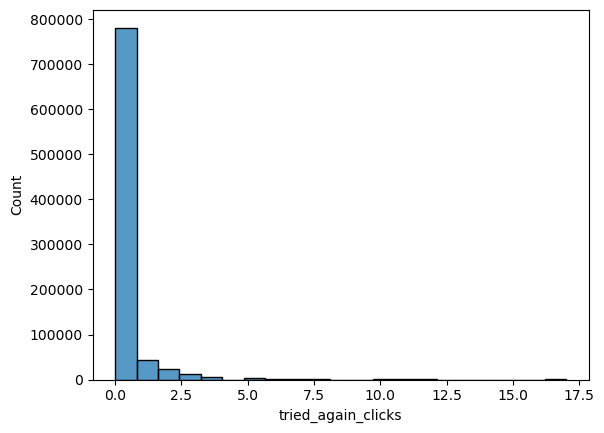

In [31]:
sns.histplot(things.tried_again_clicks)

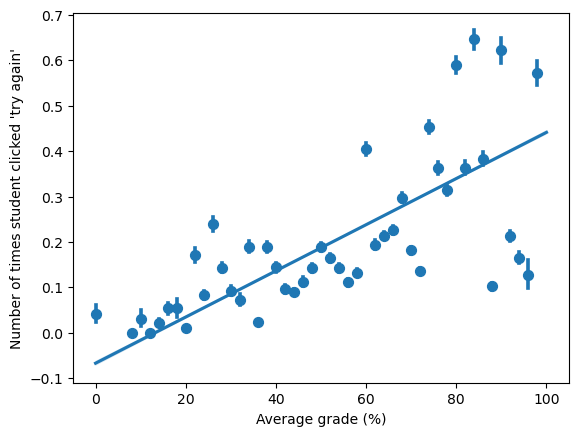

In [24]:
ax = sns.regplot(data=things, x="avg_grade",y="tried_again_clicks",
            x_bins=np.arange(0, 100, 2),
            label="Practise Question Attempts vs average grade",
            )
ax.set(xlabel="Average grade (%)", ylabel="Practise Question Attempts")
plt.show()

In [39]:
100/things.size

5.708362065422396e-05

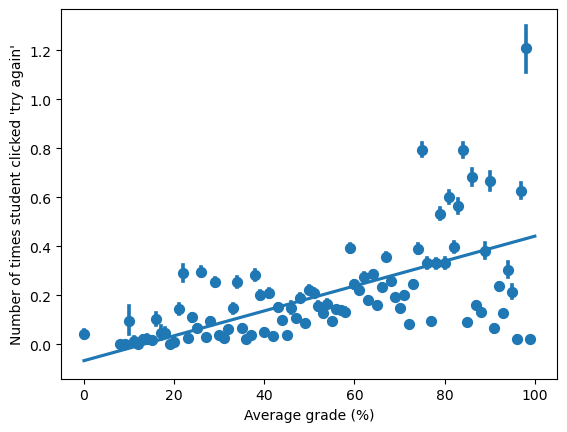

In [32]:
ax = sns.regplot(data=things, x="avg_grade",y="tried_again_clicks",
            x_bins=np.arange(0, 100, 1),
            label="Practise Question Attempts vs average grade",
            )
ax.set(xlabel="Average grade (%)", ylabel="Practise Question Attempts")
plt.show()

KeyboardInterrupt: 

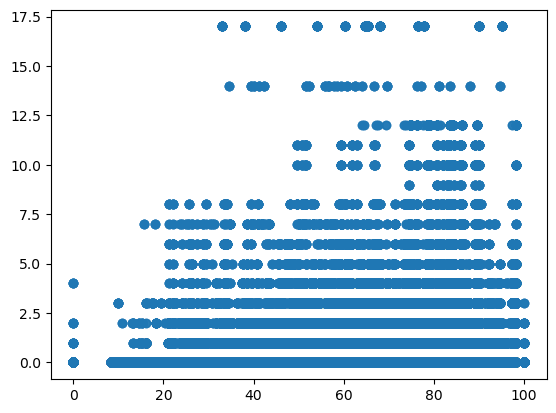

In [47]:
ax = sns.regplot(data=things, x="avg_grade",y="tried_again_clicks",
                 logistic=True,
            label="Number of times student clicked 'try again' vs average grade",
            )
ax.set(xlabel="Average grade (%)", ylabel="Number of times student clicked 'try again'")
plt.show()

In [43]:
set(page_views.columns)

{'book',
 'chapter',
 'chapter_number',
 'class_id',
 'dt_accessed',
 'engaged',
 'idle_brief',
 'idle_long',
 'institution_id',
 'off_page_brief',
 'off_page_long',
 'page',
 'release',
 'review_flag',
 'section_number',
 'student_id',
 'tried_again_clicks',
 'tried_again_dt',
 'was_complete'}

In [46]:
set(page_views.dt_accessed)
page_views.dt_accessed.dropna().size

73108

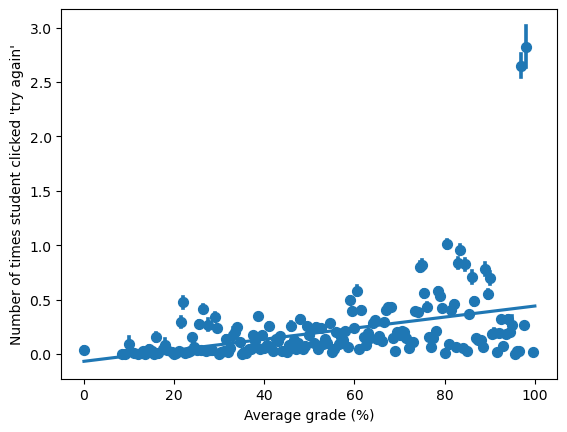

In [41]:
ax = sns.regplot(data=things, x="avg_grade",y="tried_again_clicks",
            x_bins=np.arange(0, 100, 0.5),
            label="Number of times student clicked 'try again' vs average grade",
            )
ax.set(xlabel="Average grade (%)", ylabel="Number of times student clicked 'try again'")
plt.show()

<Axes: xlabel='tried_again_clicks', ylabel='avg_grade'>

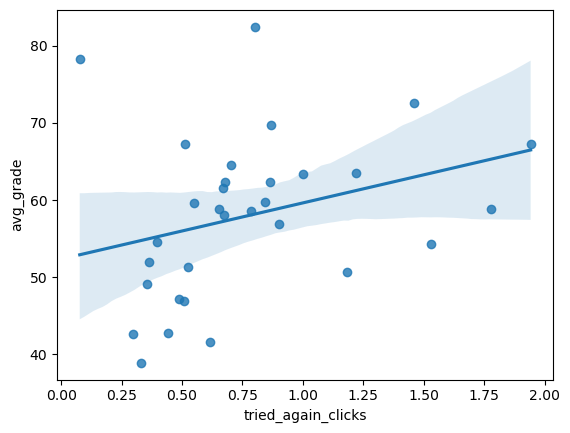

In [25]:
pag_col = "tried_again_clicks"
vals = page_views.where(~page_views.review_flag).groupby(["book","chapter_number"])[[pag_col]].std()
vals = vals.where(vals!=0)
from collections import Counter
Counter(x[0] for x in vals.where(vals>0).dropna().values.tolist())
sns.regplot(data=vals.join(chapter_performance), x=pag_col, y="avg_grade")

In [26]:
set(page_views.columns)

{'book',
 'chapter',
 'chapter_number',
 'class_id',
 'dt_accessed',
 'engaged',
 'idle_brief',
 'idle_long',
 'institution_id',
 'off_page_brief',
 'off_page_long',
 'page',
 'release',
 'review_flag',
 'section_number',
 'student_id',
 'tried_again_clicks',
 'tried_again_dt',
 'was_complete'}

In [27]:
sns.regplot(data=page_views, x="tried_again_clicks",y="")

KeyError: ''

In [ ]:
page_views.tried_again_clicks.corr(chapter_performance.avg_grade)

ValueError: cannot join with no overlapping index names

In [ ]:
chapter_performance.index

MultiIndex([(     'College / Advanced Statistics and Data Science (ABCD)',  1),
            (     'College / Advanced Statistics and Data Science (ABCD)',  2),
            (     'College / Advanced Statistics and Data Science (ABCD)',  3),
            (     'College / Advanced Statistics and Data Science (ABCD)',  4),
            (     'College / Advanced Statistics and Data Science (ABCD)',  5),
            (     'College / Advanced Statistics and Data Science (ABCD)',  6),
            (     'College / Advanced Statistics and Data Science (ABCD)',  7),
            (     'College / Advanced Statistics and Data Science (ABCD)',  8),
            (     'College / Advanced Statistics and Data Science (ABCD)',  9),
            (     'College / Advanced Statistics and Data Science (ABCD)', 10),
            (     'College / Advanced Statistics and Data Science (ABCD)', 11),
            (     'College / Advanced Statistics and Data Science (ABCD)', 12),
            (     'College / Advanced St

In [ ]:
page_views.tried_again_clicks.corr(chapter_performance.avg_grade)

ValueError: cannot join with no overlapping index names

In [ ]:
set(page_views.page.where(~page_views.review_flag))

{'1.3 Doing Statistics with R',
 '1.4 Introduction to R Functions',
 '1.5 Save Your Work in R Objects',
 '1.6 Goals of This Course',
 '10.1 The Problem of Inference',
 '10.2 Constructing a Sampling Distribution',
 '10.3 Exploring the Sampling Distribution of b1',
 '10.4 The p-Value',
 '10.5 A Mathematical Model of the Sampling Distribution of b1',
 '10.6 Things That Affect p-Value',
 '10.7 Hypothesis Testing for Regression Models',
 '11.1 Moving Beyond b1',
 '11.2 Sampling Distributions of PRE and F',
 '11.3 The Sampling Distribution of F',
 '11.4 The F-Distribution: A Mathematical Model of the Sampling Distribution of F',
 '11.5 Using F to Test a Regression Model',
 '11.6 Type I and Type II Error',
 '11.7 Using F to Compare Multiple Groups',
 '11.8 Pairwise Comparisons',
 '12.1 From Hypothesis Testing to Confidence Intervals',
 '12.2 Using Bootstrapping to Calculate the 95% Confidence Interval',
 '12.3 Shuffle, Resample, and Standard Error',
 '12.4 Interpreting the Confidence Interval

In [ ]:
eoc["avg_grade"] = eoc.loc[:,"n_correct"]/eoc.loc[:,"n_possible"]*100
chapter_performance = eoc.groupby(["book","chapter_number"])[["n_attempt","avg_grade"]].mean()
chapter_performance

C:\Users\alexe\AppData\Local\Temp\ipykernel_5920\1110343239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eoc["avg_grade"] = eoc.loc[:,"n_correct"]/eoc.loc[:,"n_possible"]*100


n_attempt  \
book                                               chapter_number               
College / Advanced Statistics and Data Science ... 1                78.341463   
                                                   2               159.397436   
                                                   3               173.108108   
                                                   4               229.253521   
                                                   5                97.225352   
                                                   6               166.214286   
                                                   7                80.887324   
                                                   8               108.225352   
                                                   9               150.000000   
                                                   10               95.814286   
                                                   11              104.117647   
                                                   12              103.884058   
                                                   13               85.911765   
                                                   14               84.625000   
                                                   15               72.037037   
                                                   16               57.000000   
College / Statistics and Data Science (ABC)        1                77.681818   
                                                   2               161.016260   
                                                   3               187.216667   
                                                   4               202.974138   
                                                   5                84.221311   
                                                   6               135.174603   
                                                   7                75.225564   
                                                   8                95.962406   
                                                   9               117.083333   
                                                   10               81.017699   
                                                   11               85.855769   
                                                   12               91.229167   
                                                   13               50.425532   
High School / Advanced Statistics and Data Scie... 1               173.333333   
                                                   2               156.000000   
                                                   3               168.142857   
                                                   4               676.714286   
                                                   5                70.000000   
                                                   6               107.833333   
                                                   7                63.666667   
                                                   8                71.200000   
                                                   9                79.600000   

                                                                   avg_grade  
book                                               chapter_number             
College / Advanced Statistics and Data Science ... 1               82.475477  
                                                   2               72.554100  
                                                   3               69.672537  
                                                   4               64.543226  
                                                   5               67.225617  
                                                   6               62.329884  
                                                   7               63.345092  
                                                   8               63.534950  
                                     

In [79]:
attempt = pd.merge(eoc, pulse, on=["student_id","class_id","book","chapter_number"], how="inner")
# attempt.drop_duplicates.groupby(["student_id"])
attempt.loc[:,["student_id","release"]]

,student_id,release
0,001824fb-a2fd-431d-aef6-7a1250d97a62,v5.0-exp1
1,001824fb-a2fd-431d-aef6-7a1250d97a62,v5.0-exp1
2,001824fb-a2fd-431d-aef6-7a1250d97a62,v5.0-exp1
3,001824fb-a2fd-431d-aef6-7a1250d97a62,v5.0-exp1
4,001824fb-a2fd-431d-aef6-7a1250d97a62,v5.0-exp1
...,...,...
6886,fef083e8-7167-4f42-82d5-d2e893aa408a,v5.0
6887,fef083e8-7167-4f42-82d5-d2e893aa408a,v5.0
6888,fef083e8-7167-4f42-82d5-d2e893aa408a,v5.0
6889,fef083e8-7167-4f42-82d5-d2e893aa408a,v5.0


In [97]:
thing = pd.to_datetime(page_views.dt_accessed)
page_views.time_of_day= pd.Series(map(lambda x: x.time(), pd.to_datetime(page_views.dt_accessed)))

page_views.time_of_day

ValueError: NaTType does not support time